In [12]:
import os
import numpy as np
import configparser
from keras.models import model_from_json
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, core, Dropout, concatenate,Activation,BatchNormalization
from keras.callbacks import ModelCheckpoint,TensorBoard

from skimage import io
from skimage.color import rgb2gray
from skimage.morphology import skeletonize
from skimage.util import invert
import matplotlib
import math

In [16]:
def getShallowUnet(patch_height,patch_width,n_ch):
    #
    inputs = Input((patch_height, patch_width,n_ch))
    #
    conv1 = Conv2D(32, (3, 3), padding="same", activation="relu")(inputs)
    conv1 = Dropout(0.2)(conv1)
    conv1 = Conv2D(32, (3, 3), padding="same", activation="relu")(conv1)
    print(conv1.shape)
    #
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    print(pool1.shape)
    #
    conv2 = Conv2D(64, (3, 3), padding="same", activation="relu")(pool1)
    conv2 = Dropout(0.2)(conv2)
    conv2 = Conv2D(64, (3, 3), padding="same", activation="relu")(conv2)
    print(conv2.shape)
    #
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    print(pool2.shape)
    #
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = Dropout(0.2)(conv3)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
    print(conv3.shape)
    #
    up1 = concatenate([UpSampling2D(size=(2, 2))(conv3), conv2], axis=-1)
    print(up1.shape)
    #
    conv4 = Conv2D(64, (3, 3), activation='relu', padding='same')(up1)
    conv4 = Dropout(0.2)(conv4)
    conv4 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv4)
    print(conv4.shape)
    #
    up2 = concatenate([UpSampling2D(size=(2, 2))(conv4), conv1], axis=-1)
    print(up2.shape)
    #
    conv5 = Conv2D(32, (3, 3), activation='relu', padding='same')(up2)
    conv5 = Dropout(0.2)(conv5)
    conv5 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv5)
    print(conv5.shape)
    #
    conv6 = Conv2D(2, (1, 1), activation='relu', padding='same')(conv5)
    print(conv6.shape)
    conv6 = core.Reshape((2,patch_height*patch_width))(conv6)
    print(conv6.shape)
    conv6 = core.Permute((2,1))(conv6)
    print(conv6.shape)
    #
    conv7 = core.Activation('softmax')(conv6)
    print(conv7.shape)

    model = Model(inputs=inputs, outputs=conv7)

    model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
    model.summary()

    return model

In [13]:
def getShallowUnet2(patch_height,patch_width,n_ch):
    #
    inputs = Input((patch_height, patch_width,n_ch))
    #
    conv1 = Conv2D(32, (3, 3), padding="same")(inputs)
    conv1 = BatchNormalization()(conv1)
    conv1 = Activation('relu')(conv1)
    conv1 = Dropout(0.2)(conv1)
    
    conv1 = Conv2D(32, (3, 3), padding="same")(conv1)
    conv1 = BatchNormalization()(conv1)
    conv1 = Activation('relu')(conv1)
    print(conv1.shape)
    #
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    print(pool1.shape)
    #
    conv2 = Conv2D(64, (3, 3), padding="same")(pool1)
    conv2 = BatchNormalization()(conv2)
    conv2 = Activation('relu')(conv2)
    conv2 = Dropout(0.2)(conv2)
    
    conv2 = Conv2D(64, (3, 3), padding="same")(conv2)
    conv2 = BatchNormalization()(conv2)
    conv2 = Activation('relu')(conv2)
    print(conv2.shape)
    #
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    print(pool2.shape)
    #
    conv3 = Conv2D(128, (3, 3), padding='same')(pool2)
    conv3 = BatchNormalization()(conv3)
    conv3 = Activation('relu')(conv3)
    conv3 = Dropout(0.2)(conv3)
    
    conv3 = Conv2D(128, (3, 3), padding='same')(conv3)
    conv3 = BatchNormalization()(conv3)
    conv3 = Activation('relu')(conv3)
    print(conv3.shape)
    #
    up1 = concatenate([UpSampling2D(size=(2, 2))(conv3), conv2], axis=-1)
    print(up1.shape)
    #
    conv4 = Conv2D(64, (3, 3),padding='same')(up1)
    conv4 = BatchNormalization()(conv4)
    conv4 = Activation('relu')(conv4)
    conv4 = Dropout(0.2)(conv4)
    
    conv4 = Conv2D(64, (3, 3), padding='same')(conv4)
    conv4 = BatchNormalization()(conv4)
    conv4 = Activation('relu')(conv4)
    print(conv4.shape)
    #
    up2 = concatenate([UpSampling2D(size=(2, 2))(conv4), conv1], axis=-1)
    print(up2.shape)
    #
    conv5 = Conv2D(32, (3, 3), padding='same')(up2)
    conv5 = BatchNormalization()(conv5)
    conv5 = Activation('relu')(conv5)
    conv5 = Dropout(0.2)(conv5)
    
    conv5 = Conv2D(32, (3, 3), padding='same')(conv5)
    conv5 = BatchNormalization()(conv5)
    conv5 = Activation('relu')(conv5)
    print(conv5.shape)
    #
    conv6 = Conv2D(2, (1, 1), activation='relu', padding='same')(conv5)
    print(conv6.shape)
    conv6 = core.Reshape((2,patch_height*patch_width))(conv6)
    print(conv6.shape)
    conv6 = core.Permute((2,1))(conv6)
    print(conv6.shape)
    #
    conv7 = core.Activation('softmax')(conv6)
    print(conv7.shape)

    model = Model(inputs=inputs, outputs=conv7)

    model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
    model.summary()

    return model

In [14]:
#read config
config = configparser.RawConfigParser()
config.read('configuration.txt')

#data location info
original_imgs_test = config.get('data paths', 'test_data')
predictions_test = config.get('data paths', 'test_preds')

#patches info
patch_height = int(config.get('data attributes', 'patch_height'))
patch_width = int(config.get('data attributes', 'patch_width'))
stride_height = int(config.get('testing settings', 'stride_height'))
stride_width = int(config.get('testing settings', 'stride_width'))

assert (stride_height < patch_height and stride_width < patch_width)

In [15]:
#load trained model
model = getShallowUnet2(patch_width, patch_height, 1)
model.load_weights('bestWeights11.h5')

(?, 32, 32, 32)
(?, 16, 16, 32)
(?, 16, 16, 64)
(?, 8, 8, 64)
(?, 8, 8, 128)
(?, 16, 16, 192)
(?, 16, 16, 64)
(?, 32, 32, 96)
(?, 32, 32, 32)
(?, 32, 32, 2)
(?, 2, 1024)
(?, 1024, 2)
(?, 1024, 2)
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 32, 32, 1)    0                                            
__________________________________________________________________________________________________
conv2d_12 (Conv2D)              (None, 32, 32, 32)   320         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_11 (BatchNo (None, 32, 32, 32)   128         conv2d_12[0][0]                  
__________________________________________________________________________________________________
activation_1

In [16]:
def add_outline(img, patch_h, patch_w, stride_h, stride_w):
    
    print(img.shape)
    img_h = img.shape[0]               
    img_w = img.shape[1]               
    leftover_h = (img_h-patch_h)%stride_h   
    leftover_w = (img_w-patch_w)%stride_w   
    
    if (leftover_h != 0):
        tmp = np.zeros((img_h+(stride_h-leftover_h),img_w,1))
        tmp[0:img_h,0:img_w,:] = img
        img = tmp
    if (leftover_w != 0):
        tmp = np.zeros((img.shape[0],img_w+(stride_w - leftover_w)))
        tmp[0:img.shape[0],0:img_w] = img
        img = tmp
        
    print ("new image shape: \n" +str(img.shape))
    
    return img

In [17]:
def get_patches(img, patch_h, patch_w, stride_h, stride_w):
    
    h = img.shape[0] 
    w = img.shape[1] 
    
    assert ((h-patch_h)%stride_h==0 and (w-patch_w)%stride_w==0)
    
    H = (h-patch_h)//stride_h+1
    W = (w-patch_w)//stride_w+1
   
    patches = np.empty((W*H,patch_h,patch_w,1))
    iter_tot = 0
    
    for h in range(H):
        for w in range(W):
            patch = img[h*stride_h:(h*stride_h)+patch_h,w*stride_w:(w*stride_w)+patch_w,:]
            patches[iter_tot]=patch
            iter_tot +=1
    
    return patches

In [18]:
def pred_to_img(pred, patch_h, patch_w):
    
    assert (len(pred.shape)==3)
    assert (pred.shape[2]==2)
    pred_image = np.empty((pred.shape[0],pred.shape[1])) 
    
    for i in range(pred.shape[0]):
        for pix in range(pred.shape[1]):
            pred_image[i,pix] = pred[i,pix,0]
            
    pred_image = np.reshape(pred_image,(pred_image.shape[0], patch_h, patch_w, 1))
    
    return pred_image

In [19]:
def build_img_from_patches(preds, img_h, img_w, stride_h, stride_w):
    
    patch_h = preds.shape[1]
    patch_w = preds.shape[2]
    
    H = (img_h-patch_h)//stride_h+1
    W = (img_w-patch_w)//stride_w+1
  
    prob = np.zeros((img_h, img_w, 1)) 
    _sum = np.zeros((img_h, img_w, 1))

    k = 0
    
    for h in range(H):
        for w in range(W):
            prob[h*stride_h:(h*stride_h)+patch_h,w*stride_w:(w*stride_w)+patch_w,:]+=preds[k]
            _sum[h*stride_h:(h*stride_h)+patch_h,w*stride_w:(w*stride_w)+patch_w,:]+=1
            k+=1
    
    final_avg = prob/_sum
    print (final_avg.shape)
    
    return final_avg

In [20]:
def predict_img(org_path):
    
    org = io.imread(org_path)
    org = rgb2gray(org)
    org = np.asarray(org, dtype='float16')
    print ('original image: ' + org_path)
    
    height = org.shape[0]
    width = org.shape[1]
    
    print ('image dims: (%d x %d)' % (height, width))
    
    org = np.reshape(org,(height, width, 1))
    assert(org.shape == (height, width, 1))
    
    org = add_outline(org, patch_height, patch_width, stride_height, stride_width)
   
    new_height = org.shape[0]
    new_width = org.shape[1]
   
    print ('new image dims: (%d x %d)' % (new_height, new_width))
   
    org = np.reshape(org,(new_height, new_width, 1))
    assert(org.shape == (new_height, new_width, 1))
   
    patches = get_patches(org, patch_height, patch_width, stride_height, stride_width)
    print(patches.shape)

    predictions = model.predict(patches, batch_size=32, verbose=2)
    print ("predicted images size :")
    print (predictions.shape)
    
    pred_patches = pred_to_img(predictions, patch_height, patch_width)
    pred_img = build_img_from_patches(pred_patches, new_height, new_width, stride_height, stride_width)
 
    return pred_img

In [21]:
#binarize predicted probability map by fixed threshold
for path, subdirs, files in os.walk(original_imgs_test):
    for i in range(len(files)):
        
        org_path = original_imgs_test + files[i]
        pred_path = predictions_test + files[i]
        
        print(org_path)
        prediction = predict_img(org_path)
        prediction2 = np.reshape(prediction, (prediction.shape[0], prediction.shape[1]))
        pred = np.empty((prediction2.shape[0],prediction2.shape[1]))
        for i in range(prediction2.shape[0]):
            for j in range(prediction2.shape[1]):
                if prediction2[i][j]>=0.5:
                    pred[i][j] = 1
                else:
                    pred[i][j] = 0
        io.imsave(pred_path, pred.astype(np.uint8))

./data/test/org/corneacrop-5-6-3.tif
original image: ./data/test/org/corneacrop-5-6-3.tif
image dims: (500 x 500)
(500, 500, 1)
new image shape: 
(500, 500, 1)
new image dims: (500 x 500)
(55225, 32, 32, 1)
predicted images size :
(55225, 1024, 2)
(500, 500, 1)


/software/tensorflow/2.0.0b/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: ./data/test/pred/corneacrop-5-6-3.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


./data/test/org/corneacrop-5-3-3.tif
original image: ./data/test/org/corneacrop-5-3-3.tif
image dims: (500 x 500)
(500, 500, 1)
new image shape: 
(500, 500, 1)
new image dims: (500 x 500)
(55225, 32, 32, 1)
predicted images size :
(55225, 1024, 2)
(500, 500, 1)


/software/tensorflow/2.0.0b/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: ./data/test/pred/corneacrop-5-3-3.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


./data/test/org/corneacrop-5-3-1.tif
original image: ./data/test/org/corneacrop-5-3-1.tif
image dims: (500 x 500)
(500, 500, 1)
new image shape: 
(500, 500, 1)
new image dims: (500 x 500)
(55225, 32, 32, 1)
predicted images size :
(55225, 1024, 2)
(500, 500, 1)


/software/tensorflow/2.0.0b/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: ./data/test/pred/corneacrop-5-3-1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


./data/test/org/corneacrop-5-3-6.tif
original image: ./data/test/org/corneacrop-5-3-6.tif
image dims: (500 x 500)
(500, 500, 1)
new image shape: 
(500, 500, 1)
new image dims: (500 x 500)
(55225, 32, 32, 1)
predicted images size :
(55225, 1024, 2)
(500, 500, 1)


/software/tensorflow/2.0.0b/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: ./data/test/pred/corneacrop-5-3-6.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


./data/test/org/corneacrop-5-6-6.tif
original image: ./data/test/org/corneacrop-5-6-6.tif
image dims: (500 x 500)
(500, 500, 1)
new image shape: 
(500, 500, 1)
new image dims: (500 x 500)
(55225, 32, 32, 1)
predicted images size :
(55225, 1024, 2)
(500, 500, 1)


/software/tensorflow/2.0.0b/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: ./data/test/pred/corneacrop-5-6-6.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


./data/test/org/corneacrop-5-9-5.tif
original image: ./data/test/org/corneacrop-5-9-5.tif
image dims: (500 x 500)
(500, 500, 1)
new image shape: 
(500, 500, 1)
new image dims: (500 x 500)
(55225, 32, 32, 1)
predicted images size :
(55225, 1024, 2)
(500, 500, 1)


/software/tensorflow/2.0.0b/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: ./data/test/pred/corneacrop-5-9-5.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


./data/test/org/corneacrop-5-9-4.tif
original image: ./data/test/org/corneacrop-5-9-4.tif
image dims: (500 x 500)
(500, 500, 1)
new image shape: 
(500, 500, 1)
new image dims: (500 x 500)
(55225, 32, 32, 1)
predicted images size :
(55225, 1024, 2)
(500, 500, 1)


/software/tensorflow/2.0.0b/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: ./data/test/pred/corneacrop-5-9-4.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


./data/test/org/corneacrop-5-9-6.tif
original image: ./data/test/org/corneacrop-5-9-6.tif
image dims: (500 x 500)
(500, 500, 1)
new image shape: 
(500, 500, 1)
new image dims: (500 x 500)
(55225, 32, 32, 1)
predicted images size :
(55225, 1024, 2)
(500, 500, 1)


/software/tensorflow/2.0.0b/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: ./data/test/pred/corneacrop-5-9-6.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


./data/test/org/corneacrop-5-12-4.tif
original image: ./data/test/org/corneacrop-5-12-4.tif
image dims: (500 x 500)
(500, 500, 1)
new image shape: 
(500, 500, 1)
new image dims: (500 x 500)
(55225, 32, 32, 1)
predicted images size :
(55225, 1024, 2)
(500, 500, 1)


/software/tensorflow/2.0.0b/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: ./data/test/pred/corneacrop-5-12-4.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


./data/test/org/corneacrop-5-12-5.tif
original image: ./data/test/org/corneacrop-5-12-5.tif
image dims: (500 x 500)
(500, 500, 1)
new image shape: 
(500, 500, 1)
new image dims: (500 x 500)
(55225, 32, 32, 1)
predicted images size :
(55225, 1024, 2)
(500, 500, 1)


/software/tensorflow/2.0.0b/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: ./data/test/pred/corneacrop-5-12-5.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


./data/test/org/corneacrop-5-center-6.tif
original image: ./data/test/org/corneacrop-5-center-6.tif
image dims: (500 x 500)
(500, 500, 1)
new image shape: 
(500, 500, 1)
new image dims: (500 x 500)
(55225, 32, 32, 1)
predicted images size :
(55225, 1024, 2)
(500, 500, 1)


/software/tensorflow/2.0.0b/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: ./data/test/pred/corneacrop-5-center-6.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


./data/test/org/corneacrop-5-6-2.tif
original image: ./data/test/org/corneacrop-5-6-2.tif
image dims: (500 x 500)
(500, 500, 1)
new image shape: 
(500, 500, 1)
new image dims: (500 x 500)
(55225, 32, 32, 1)
predicted images size :
(55225, 1024, 2)
(500, 500, 1)


/software/tensorflow/2.0.0b/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: ./data/test/pred/corneacrop-5-6-2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


./data/test/org/corneacrop-5-3-5.tif
original image: ./data/test/org/corneacrop-5-3-5.tif
image dims: (500 x 500)
(500, 500, 1)
new image shape: 
(500, 500, 1)
new image dims: (500 x 500)
(55225, 32, 32, 1)
predicted images size :
(55225, 1024, 2)
(500, 500, 1)


/software/tensorflow/2.0.0b/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: ./data/test/pred/corneacrop-5-3-5.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


./data/test/org/corneacrop-5-6-4.tif
original image: ./data/test/org/corneacrop-5-6-4.tif
image dims: (500 x 500)
(500, 500, 1)
new image shape: 
(500, 500, 1)
new image dims: (500 x 500)
(55225, 32, 32, 1)
predicted images size :
(55225, 1024, 2)
(500, 500, 1)


/software/tensorflow/2.0.0b/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: ./data/test/pred/corneacrop-5-6-4.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


./data/test/org/corneacrop-5-3-2.tif
original image: ./data/test/org/corneacrop-5-3-2.tif
image dims: (500 x 500)
(500, 500, 1)
new image shape: 
(500, 500, 1)
new image dims: (500 x 500)
(55225, 32, 32, 1)
predicted images size :
(55225, 1024, 2)
(500, 500, 1)


/software/tensorflow/2.0.0b/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: ./data/test/pred/corneacrop-5-3-2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


./data/test/org/corneacrop-5-9-3.tif
original image: ./data/test/org/corneacrop-5-9-3.tif
image dims: (500 x 500)
(500, 500, 1)
new image shape: 
(500, 500, 1)
new image dims: (500 x 500)
(55225, 32, 32, 1)
predicted images size :
(55225, 1024, 2)
(500, 500, 1)


/software/tensorflow/2.0.0b/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: ./data/test/pred/corneacrop-5-9-3.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


./data/test/org/corneacrop-5-center-2.tif
original image: ./data/test/org/corneacrop-5-center-2.tif
image dims: (500 x 500)
(500, 500, 1)
new image shape: 
(500, 500, 1)
new image dims: (500 x 500)
(55225, 32, 32, 1)
predicted images size :
(55225, 1024, 2)
(500, 500, 1)


/software/tensorflow/2.0.0b/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: ./data/test/pred/corneacrop-5-center-2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


./data/test/org/corneacrop-5-6-1.tif
original image: ./data/test/org/corneacrop-5-6-1.tif
image dims: (500 x 500)
(500, 500, 1)
new image shape: 
(500, 500, 1)
new image dims: (500 x 500)
(55225, 32, 32, 1)
predicted images size :
(55225, 1024, 2)
(500, 500, 1)


/software/tensorflow/2.0.0b/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: ./data/test/pred/corneacrop-5-6-1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


./data/test/org/corneacrop-5-3-4.tif
original image: ./data/test/org/corneacrop-5-3-4.tif
image dims: (500 x 500)
(500, 500, 1)
new image shape: 
(500, 500, 1)
new image dims: (500 x 500)
(55225, 32, 32, 1)
predicted images size :
(55225, 1024, 2)
(500, 500, 1)


/software/tensorflow/2.0.0b/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: ./data/test/pred/corneacrop-5-3-4.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


./data/test/org/corneacrop-5-9-1.tif
original image: ./data/test/org/corneacrop-5-9-1.tif
image dims: (500 x 500)
(500, 500, 1)
new image shape: 
(500, 500, 1)
new image dims: (500 x 500)
(55225, 32, 32, 1)
predicted images size :
(55225, 1024, 2)
(500, 500, 1)


/software/tensorflow/2.0.0b/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: ./data/test/pred/corneacrop-5-9-1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


./data/test/org/corneacrop-5-12-1.tif
original image: ./data/test/org/corneacrop-5-12-1.tif
image dims: (500 x 500)
(500, 500, 1)
new image shape: 
(500, 500, 1)
new image dims: (500 x 500)
(55225, 32, 32, 1)
predicted images size :
(55225, 1024, 2)
(500, 500, 1)


/software/tensorflow/2.0.0b/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: ./data/test/pred/corneacrop-5-12-1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


./data/test/org/corneacrop-5-12-3.tif
original image: ./data/test/org/corneacrop-5-12-3.tif
image dims: (500 x 500)
(500, 500, 1)
new image shape: 
(500, 500, 1)
new image dims: (500 x 500)
(55225, 32, 32, 1)
predicted images size :
(55225, 1024, 2)
(500, 500, 1)


/software/tensorflow/2.0.0b/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: ./data/test/pred/corneacrop-5-12-3.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


./data/test/org/corneacrop-5-center-1.tif
original image: ./data/test/org/corneacrop-5-center-1.tif
image dims: (500 x 500)
(500, 500, 1)
new image shape: 
(500, 500, 1)
new image dims: (500 x 500)
(55225, 32, 32, 1)
predicted images size :
(55225, 1024, 2)
(500, 500, 1)


/software/tensorflow/2.0.0b/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: ./data/test/pred/corneacrop-5-center-1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


./data/test/org/corneacrop-5-12-2.tif
original image: ./data/test/org/corneacrop-5-12-2.tif
image dims: (500 x 500)
(500, 500, 1)
new image shape: 
(500, 500, 1)
new image dims: (500 x 500)
(55225, 32, 32, 1)
predicted images size :
(55225, 1024, 2)
(500, 500, 1)


/software/tensorflow/2.0.0b/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: ./data/test/pred/corneacrop-5-12-2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


./data/test/org/corneacrop-5-center-5.tif
original image: ./data/test/org/corneacrop-5-center-5.tif
image dims: (500 x 500)
(500, 500, 1)
new image shape: 
(500, 500, 1)
new image dims: (500 x 500)
(55225, 32, 32, 1)
predicted images size :
(55225, 1024, 2)
(500, 500, 1)


/software/tensorflow/2.0.0b/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: ./data/test/pred/corneacrop-5-center-5.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


./data/test/org/corneacrop-5-9-2.tif
original image: ./data/test/org/corneacrop-5-9-2.tif
image dims: (500 x 500)
(500, 500, 1)
new image shape: 
(500, 500, 1)
new image dims: (500 x 500)
(55225, 32, 32, 1)
predicted images size :
(55225, 1024, 2)
(500, 500, 1)


/software/tensorflow/2.0.0b/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: ./data/test/pred/corneacrop-5-9-2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


./data/test/org/corneacrop-5-center-4.tif
original image: ./data/test/org/corneacrop-5-center-4.tif
image dims: (500 x 500)
(500, 500, 1)
new image shape: 
(500, 500, 1)
new image dims: (500 x 500)
(55225, 32, 32, 1)
predicted images size :
(55225, 1024, 2)
(500, 500, 1)


/software/tensorflow/2.0.0b/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: ./data/test/pred/corneacrop-5-center-4.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


./data/test/org/corneacrop-5-center-3.tif
original image: ./data/test/org/corneacrop-5-center-3.tif
image dims: (500 x 500)
(500, 500, 1)
new image shape: 
(500, 500, 1)
new image dims: (500 x 500)
(55225, 32, 32, 1)
predicted images size :
(55225, 1024, 2)
(500, 500, 1)


/software/tensorflow/2.0.0b/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: ./data/test/pred/corneacrop-5-center-3.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


./data/test/org/corneacrop-5-12-6.tif
original image: ./data/test/org/corneacrop-5-12-6.tif
image dims: (500 x 500)
(500, 500, 1)
new image shape: 
(500, 500, 1)
new image dims: (500 x 500)
(55225, 32, 32, 1)
predicted images size :
(55225, 1024, 2)
(500, 500, 1)


/software/tensorflow/2.0.0b/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: ./data/test/pred/corneacrop-5-12-6.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


./data/test/org/corneacrop-5-6-5.tif
original image: ./data/test/org/corneacrop-5-6-5.tif
image dims: (500 x 500)
(500, 500, 1)
new image shape: 
(500, 500, 1)
new image dims: (500 x 500)
(55225, 32, 32, 1)
predicted images size :
(55225, 1024, 2)
(500, 500, 1)


/software/tensorflow/2.0.0b/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: ./data/test/pred/corneacrop-5-6-5.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


In [30]:
#================================================
# binarize predicted probability map by adaptive threshold method
for path, subdirs, files in os.walk(original_imgs_test):
    for i in range(len(files)):
        
        org_path = original_imgs_test + files[i]
        pred_path = predictions_test + files[i]
        
        print(org_path)
        prediction = predict_img(org_path)
        prediction2 = np.reshape(prediction, (prediction.shape[0], prediction.shape[1]))
        mean_bid = np.empty((10,10))
        sd_bid = np.empty((10,10))
        for i in range(10):
            for j in range(10):
                matrix = prediction2[i*50:(i+1)*50,j*50:(j+1)*50]
                mean_bid[i,j] = np.mean(matrix)
                sd_bid[i,j] = np.std(matrix)
        R = math.log(np.max(sd_bid)/np.min(sd_bid),2)
        pred = np.empty((prediction2.shape[0],prediction2.shape[1]))
        for i in range(prediction2.shape[0]):
            for j in range(prediction2.shape[1]):
                row = int(i/50)
                col = int(j/50)
                threshold = mean_bid[row,col]*(1+0.2*(sd_bid[row,col]/R-1))
                if prediction2[i][j]>=threshold:
                    pred[i][j] = 1
                else:
                    pred[i][j] = 0
        pred = skeletonize(pred)
        io.imsave(pred_path, pred.astype(np.uint8))

./data/test/org/corneacrop-4-3-2.tif
original image: ./data/test/org/corneacrop-4-3-2.tif
image dims: (500 x 500)
(500, 500, 1)
new image shape: 
(500, 500, 1)
new image dims: (500 x 500)
(55225, 32, 32, 1)
predicted images size :
(55225, 1024, 2)
(500, 500, 1)


/software/tensorflow/2.0.0b/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: ./data/test/pred/corneacrop-4-3-2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


./data/test/org/corneacrop-4-12-1.tif
original image: ./data/test/org/corneacrop-4-12-1.tif
image dims: (500 x 500)
(500, 500, 1)
new image shape: 
(500, 500, 1)
new image dims: (500 x 500)
(55225, 32, 32, 1)
predicted images size :
(55225, 1024, 2)
(500, 500, 1)


/software/tensorflow/2.0.0b/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: ./data/test/pred/corneacrop-4-12-1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


./data/test/org/corneacrop-4-3-3.tif
original image: ./data/test/org/corneacrop-4-3-3.tif
image dims: (500 x 500)
(500, 500, 1)
new image shape: 
(500, 500, 1)
new image dims: (500 x 500)
(55225, 32, 32, 1)
predicted images size :
(55225, 1024, 2)
(500, 500, 1)


/software/tensorflow/2.0.0b/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: ./data/test/pred/corneacrop-4-3-3.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


./data/test/org/corneacrop-4-6-1.tif
original image: ./data/test/org/corneacrop-4-6-1.tif
image dims: (500 x 500)
(500, 500, 1)
new image shape: 
(500, 500, 1)
new image dims: (500 x 500)
(55225, 32, 32, 1)
predicted images size :
(55225, 1024, 2)
(500, 500, 1)


/software/tensorflow/2.0.0b/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: ./data/test/pred/corneacrop-4-6-1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


./data/test/org/corneacrop-4-center-1.tif
original image: ./data/test/org/corneacrop-4-center-1.tif
image dims: (500 x 500)
(500, 500, 1)
new image shape: 
(500, 500, 1)
new image dims: (500 x 500)
(55225, 32, 32, 1)
predicted images size :
(55225, 1024, 2)
(500, 500, 1)


/software/tensorflow/2.0.0b/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: ./data/test/pred/corneacrop-4-center-1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


./data/test/org/corneacrop-4-12-3.tif
original image: ./data/test/org/corneacrop-4-12-3.tif
image dims: (500 x 500)
(500, 500, 1)
new image shape: 
(500, 500, 1)
new image dims: (500 x 500)
(55225, 32, 32, 1)
predicted images size :
(55225, 1024, 2)
(500, 500, 1)


/software/tensorflow/2.0.0b/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: ./data/test/pred/corneacrop-4-12-3.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


./data/test/org/corneacrop-4-center-5.tif
original image: ./data/test/org/corneacrop-4-center-5.tif
image dims: (500 x 500)
(500, 500, 1)
new image shape: 
(500, 500, 1)
new image dims: (500 x 500)
(55225, 32, 32, 1)
predicted images size :
(55225, 1024, 2)
(500, 500, 1)


/software/tensorflow/2.0.0b/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: ./data/test/pred/corneacrop-4-center-5.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


./data/test/org/corneacrop-4-12-2.tif
original image: ./data/test/org/corneacrop-4-12-2.tif
image dims: (500 x 500)
(500, 500, 1)
new image shape: 
(500, 500, 1)
new image dims: (500 x 500)
(55225, 32, 32, 1)
predicted images size :
(55225, 1024, 2)
(500, 500, 1)


/software/tensorflow/2.0.0b/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: ./data/test/pred/corneacrop-4-12-2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


./data/test/org/corneacrop-4-center-6.tif
original image: ./data/test/org/corneacrop-4-center-6.tif
image dims: (500 x 500)
(500, 500, 1)
new image shape: 
(500, 500, 1)
new image dims: (500 x 500)
(55225, 32, 32, 1)
predicted images size :
(55225, 1024, 2)
(500, 500, 1)


/software/tensorflow/2.0.0b/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: ./data/test/pred/corneacrop-4-center-6.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


./data/test/org/corneacrop-4-6-3.tif
original image: ./data/test/org/corneacrop-4-6-3.tif
image dims: (500 x 500)
(500, 500, 1)
new image shape: 
(500, 500, 1)
new image dims: (500 x 500)
(55225, 32, 32, 1)
predicted images size :
(55225, 1024, 2)
(500, 500, 1)


/software/tensorflow/2.0.0b/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: ./data/test/pred/corneacrop-4-6-3.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


./data/test/org/corneacrop-4-3-5.tif
original image: ./data/test/org/corneacrop-4-3-5.tif
image dims: (500 x 500)
(500, 500, 1)
new image shape: 
(500, 500, 1)
new image dims: (500 x 500)
(55225, 32, 32, 1)
predicted images size :
(55225, 1024, 2)
(500, 500, 1)


/software/tensorflow/2.0.0b/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: ./data/test/pred/corneacrop-4-3-5.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


./data/test/org/corneacrop-4-center-3.tif
original image: ./data/test/org/corneacrop-4-center-3.tif
image dims: (500 x 500)
(500, 500, 1)
new image shape: 
(500, 500, 1)
new image dims: (500 x 500)
(55225, 32, 32, 1)
predicted images size :
(55225, 1024, 2)
(500, 500, 1)


/software/tensorflow/2.0.0b/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: ./data/test/pred/corneacrop-4-center-3.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


./data/test/org/corneacrop-4-3-4.tif
original image: ./data/test/org/corneacrop-4-3-4.tif
image dims: (500 x 500)
(500, 500, 1)
new image shape: 
(500, 500, 1)
new image dims: (500 x 500)
(55225, 32, 32, 1)
predicted images size :
(55225, 1024, 2)
(500, 500, 1)


/software/tensorflow/2.0.0b/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: ./data/test/pred/corneacrop-4-3-4.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


./data/test/org/corneacrop-4-6-5.tif
original image: ./data/test/org/corneacrop-4-6-5.tif
image dims: (500 x 500)
(500, 500, 1)
new image shape: 
(500, 500, 1)
new image dims: (500 x 500)
(55225, 32, 32, 1)
predicted images size :
(55225, 1024, 2)
(500, 500, 1)


/software/tensorflow/2.0.0b/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: ./data/test/pred/corneacrop-4-6-5.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


./data/test/org/corneacrop-4-6-2.tif
original image: ./data/test/org/corneacrop-4-6-2.tif
image dims: (500 x 500)
(500, 500, 1)
new image shape: 
(500, 500, 1)
new image dims: (500 x 500)
(55225, 32, 32, 1)
predicted images size :
(55225, 1024, 2)
(500, 500, 1)


/software/tensorflow/2.0.0b/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: ./data/test/pred/corneacrop-4-6-2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


./data/test/org/corneacrop-4-3-1.tif
original image: ./data/test/org/corneacrop-4-3-1.tif
image dims: (500 x 500)
(500, 500, 1)
new image shape: 
(500, 500, 1)
new image dims: (500 x 500)
(55225, 32, 32, 1)
predicted images size :
(55225, 1024, 2)
(500, 500, 1)


/software/tensorflow/2.0.0b/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: ./data/test/pred/corneacrop-4-3-1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


./data/test/org/corneacrop-4-6-6.tif
original image: ./data/test/org/corneacrop-4-6-6.tif
image dims: (500 x 500)
(500, 500, 1)
new image shape: 
(500, 500, 1)
new image dims: (500 x 500)
(55225, 32, 32, 1)
predicted images size :
(55225, 1024, 2)
(500, 500, 1)


/software/tensorflow/2.0.0b/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: ./data/test/pred/corneacrop-4-6-6.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


./data/test/org/corneacrop-4-center-2.tif
original image: ./data/test/org/corneacrop-4-center-2.tif
image dims: (500 x 500)
(500, 500, 1)
new image shape: 
(500, 500, 1)
new image dims: (500 x 500)
(55225, 32, 32, 1)
predicted images size :
(55225, 1024, 2)
(500, 500, 1)


/software/tensorflow/2.0.0b/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: ./data/test/pred/corneacrop-4-center-2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


./data/test/org/corneacrop-4-3-6.tif
original image: ./data/test/org/corneacrop-4-3-6.tif
image dims: (500 x 500)
(500, 500, 1)
new image shape: 
(500, 500, 1)
new image dims: (500 x 500)
(55225, 32, 32, 1)
predicted images size :
(55225, 1024, 2)
(500, 500, 1)


/software/tensorflow/2.0.0b/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: ./data/test/pred/corneacrop-4-3-6.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


./data/test/org/corneacrop-4-12-5.tif
original image: ./data/test/org/corneacrop-4-12-5.tif
image dims: (500 x 500)
(500, 500, 1)
new image shape: 
(500, 500, 1)
new image dims: (500 x 500)
(55225, 32, 32, 1)
predicted images size :
(55225, 1024, 2)
(500, 500, 1)


/software/tensorflow/2.0.0b/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: ./data/test/pred/corneacrop-4-12-5.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


./data/test/org/corneacrop-4-center-4.tif
original image: ./data/test/org/corneacrop-4-center-4.tif
image dims: (500 x 500)
(500, 500, 1)
new image shape: 
(500, 500, 1)
new image dims: (500 x 500)
(55225, 32, 32, 1)
predicted images size :
(55225, 1024, 2)
(500, 500, 1)


/software/tensorflow/2.0.0b/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: ./data/test/pred/corneacrop-4-center-4.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


In [7]:
pred = io.imread(predictions_test+'corneacrop-4-12-1.tif')

In [97]:
skeleton2 = skeletonize(pred)

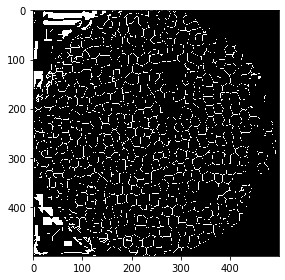

In [99]:
io.imshow(skeleton2)

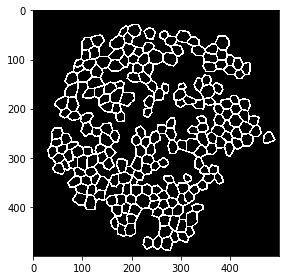

In [101]:
io.imshow(y)